# Задание 2.0

## Подключаем нужные библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

## Загружаем Dataset

In [4]:
df = pd.read_csv("d:/loan_train.csv")
df = df.dropna()
df.head()

In [5]:
le = LabelEncoder()
df_encode= df.copy()
for i, f in enumerate(df.select_dtypes(include="object")):
    le.fit(df_encode[f])  
    df_encode[f] = le.fit_transform(df_encode[f])

In [7]:
df_encode.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1


In [8]:
X, y = df_encode.drop(columns='Status'), df_encode["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

<Axes: ylabel='Density'>

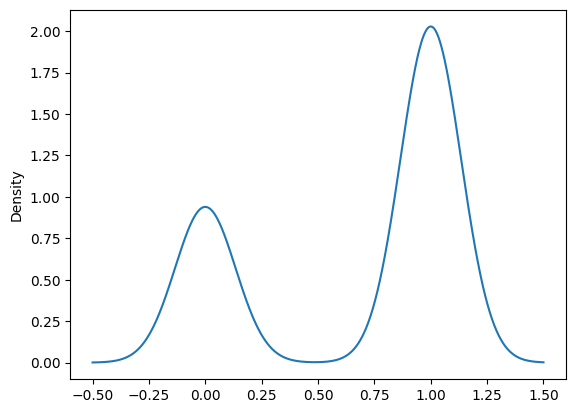

In [9]:
y.plot(kind='kde')

In [25]:
dummy = DummyClassifier(strategy='prior')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)
print(classification_report(y_test, y_preds_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.70      1.00      0.82        87

    accuracy                           0.70       125
   macro avg       0.35      0.50      0.41       125
weighted avg       0.48      0.70      0.57       125



In [26]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_preds_lg = lg.predict(X_test)
print(classification_report(y_test, y_preds_lg))

              precision    recall  f1-score   support

           0       0.92      0.29      0.44        38
           1       0.76      0.99      0.86        87

    accuracy                           0.78       125
   macro avg       0.84      0.64      0.65       125
weighted avg       0.81      0.78      0.73       125



In [33]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_preds_knn = knn.predict(X_test)
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.40      0.26      0.32        38
           1       0.72      0.83      0.77        87

    accuracy                           0.66       125
   macro avg       0.56      0.55      0.54       125
weighted avg       0.62      0.66      0.63       125



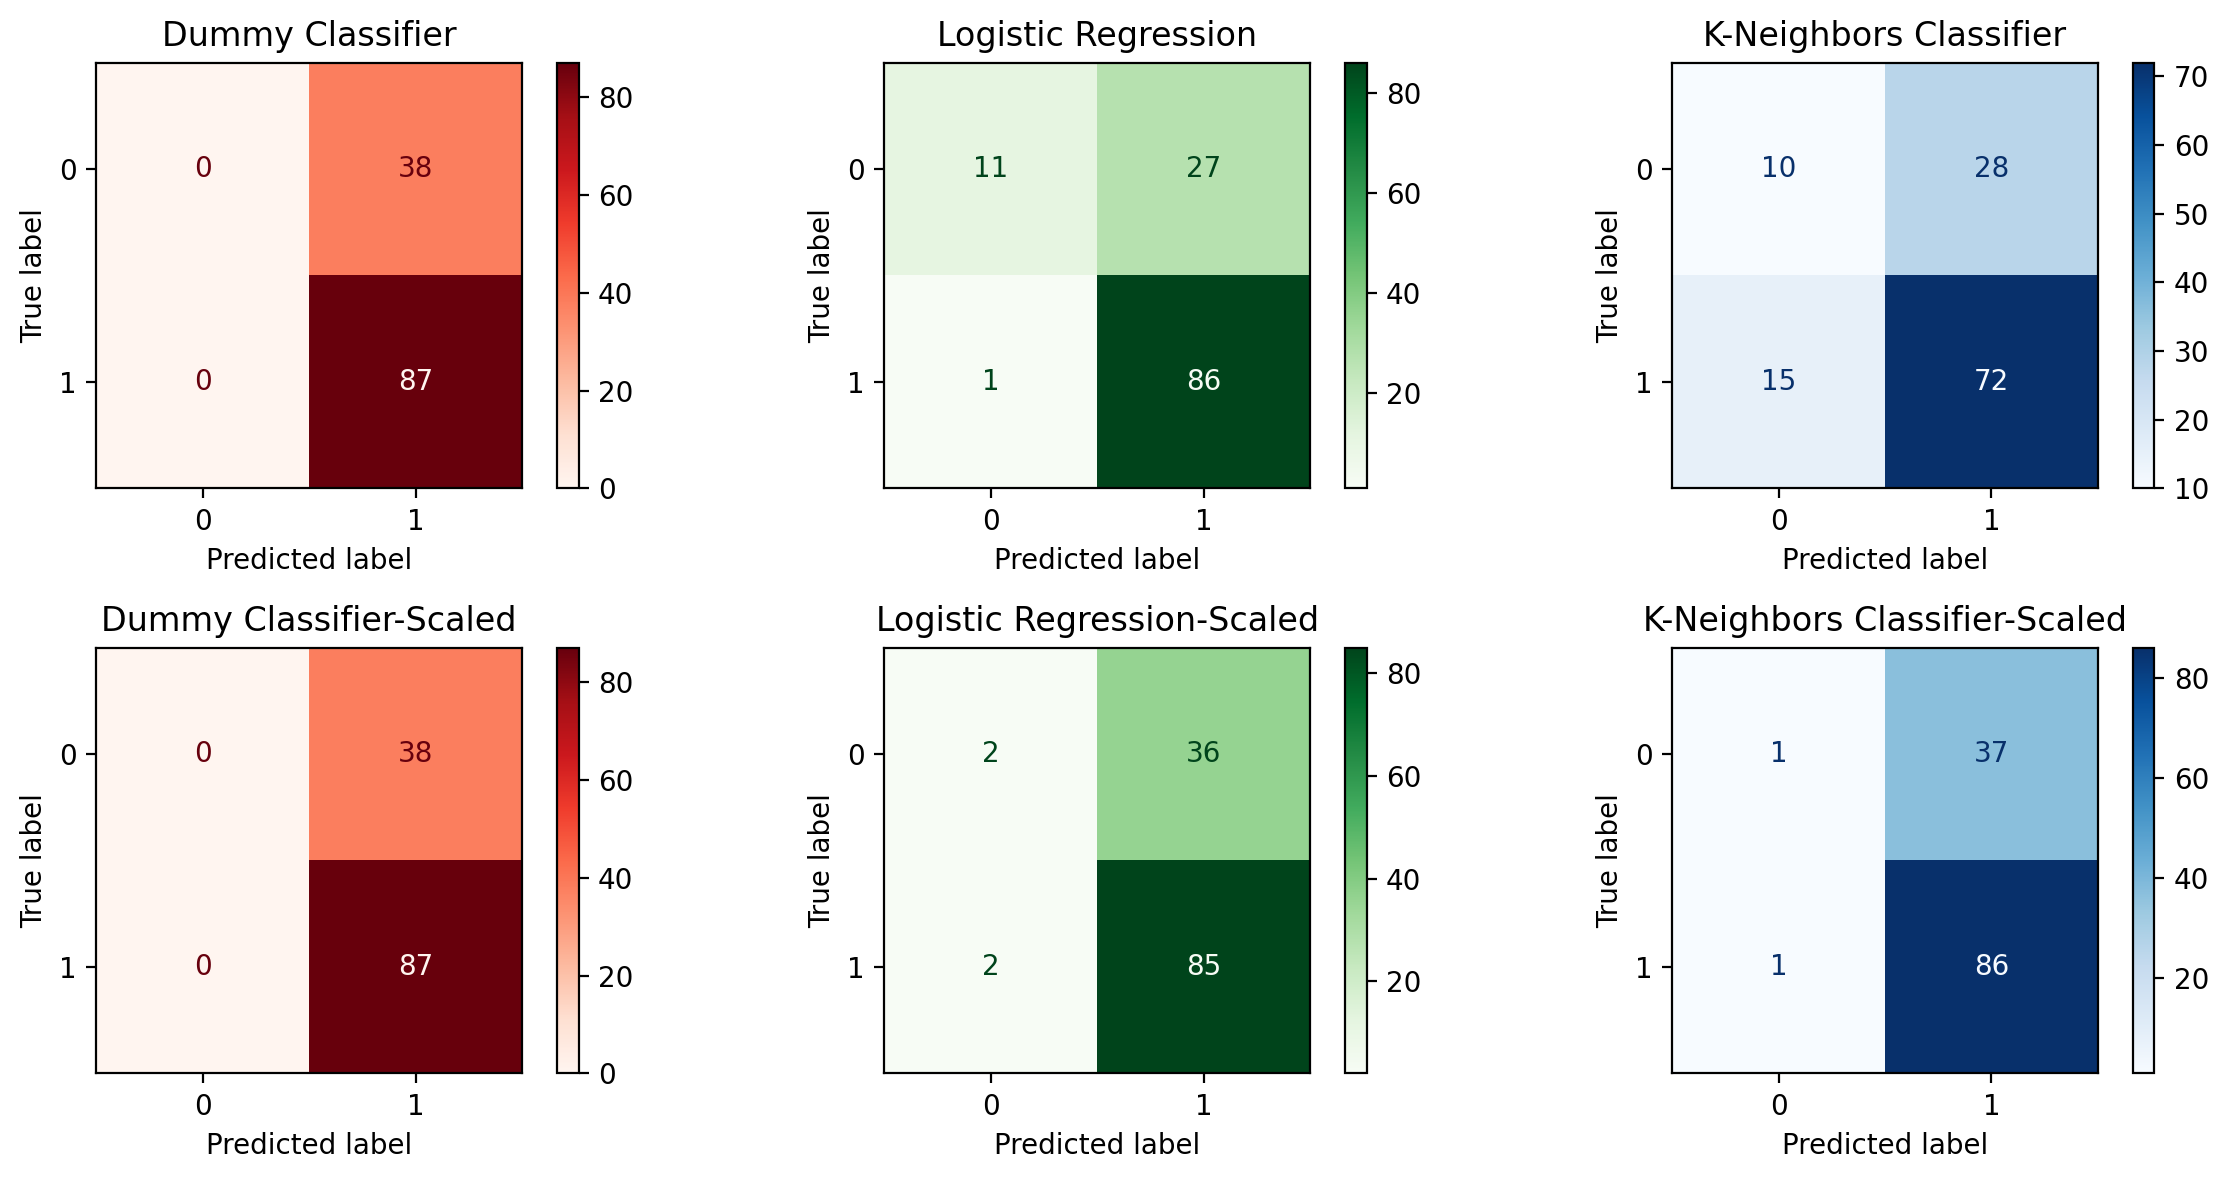

In [43]:
fig, axes = plt.subplots(ncols=3, nrows=2, dpi=200, figsize=(12,6))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_dummy)).plot(cmap='Reds', ax=axes[0][0], )
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_lg)).plot(cmap='Greens', ax=axes[0][1])
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_knn)).plot(cmap='Blues', ax=axes[0][2])
axes[0][0].set_title("Dummy Classifier")
axes[0][1].set_title("Logistic Regression")
axes[0][2].set_title("K-Neighbors Classifier")

ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_dummy_sc)).plot(cmap='Reds', ax=axes[1][0], )
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_lg_sc)).plot(cmap='Greens', ax=axes[1][1])
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds_knn_sc)).plot(cmap='Blues', ax=axes[1][2])
axes[1][0].set_title("Dummy Classifier-Scaled")
axes[1][1].set_title("Logistic Regression-Scaled")
axes[1][2].set_title("K-Neighbors Classifier-Scaled")

plt.tight_layout()

Выводы по Задаче 1.3: рассмотренные модели показали давольно низкую сходимость результатов. Для выбранного датасета требуется более глубокое обучение